In [1]:
# For general data science and matrix manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

# For pathway analysis in python
import sspa
import gseapy

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# For network creation and visualisation
import networkx as nx

In [2]:
# Getting my data to look like theirs:
gt_file = "/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/mummichog/anaylse_results_trans_omic_covid_data/m_MTBLS2542_Metabo_LC-MS_positive_reverse-phase_v2_maf.tsv"
gt = pd.read_csv(gt_file, sep='\t')
gt = gt.dropna(axis=1, how='all')
drop_cols = [col for col in gt.columns if col[0] != '2' and col not in ["metabolite_identification"]]
gt.drop(columns=drop_cols, inplace=True)
gt = gt.rename(columns={gt.columns[0]: 'sample_id'})
gt = gt.set_index('sample_id')
gt = gt.transpose()
# print(gt.head())#.iloc[:, :5])

df_meta = pd.read_csv("/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/data/trans_omic_untargeted/meta_data.csv")
df_meta = df_meta[['sample_id', 'is_bad', 'age']]
df_meta = df_meta[df_meta['sample_id'].isin(gt.index)]
df_meta = df_meta.set_index('sample_id')

df_combined = gt.merge(df_meta, left_index=True, right_index=True)
df_combined["is_bad"] = df_combined["is_bad"].fillna(0).astype(int)
df_combined["age"] = df_combined["age"].fillna(0).astype(int)

df_values = df_combined.iloc[:, :-2]

# print(df_combined.head())
# print("____________________")
# print(df_values.head())




In [3]:
print(len(df_values))
data_filt = df_values.loc[:, df_values.isin([' ', np.nan, 0]).mean() < 0.5]
print(len(data_filt))
imputed_mat = data_filt.fillna(data_filt.median())
print(len(imputed_mat))
log2_mat = np.log2(imputed_mat)
print(len(log2_mat))
processed_data = pd.DataFrame(StandardScaler().fit_transform(log2_mat), columns=imputed_mat.columns, index=imputed_mat.index)
print(len(processed_data))
processed_data.head()


158
158
158
158
158


,Spermidine,L-lysine,Pipecolate,D-ornithine,"Nepsilon,nepsilon,nepsilon-trimethyllysine",Choline,L-histidine,L-arginine,1-methylnicotinamide,Guanidinoacetate,...,alpha-eleostearic acid,Palmitoleic acid,Docosahexaenoic acid,Arachidonic acid,1-oleoyl-rac-glycerol,Docosapentaenoic acid,Eicosapentaenoic acid methyl ester,Citral,3-acetyl-11-keto-beta-boswellic acid,Oleate
20P02820216_BEHC18_POS,-0.779137,-0.104941,-0.114293,0.473686,1.503391,-0.402144,0.284296,1.445898,-1.374745,1.569815,...,-1.914515,-2.066976,-1.405936,-0.653045,-1.670770,-1.452937,-0.679753,-1.280216,-0.928677,-1.959673
20P02820217_BEHC18_POS,0.800701,-0.748642,-0.730435,-1.088297,-2.057692,-0.426981,0.946346,-0.205979,-0.814134,-0.288248,...,0.193375,0.840322,0.622559,1.475310,-1.022829,0.983929,0.924482,-0.450560,-0.317328,0.849991
20P02820215_BEHC18_POS,-0.045873,0.451114,0.453914,-0.345614,-0.369913,0.062922,2.284742,0.653759,-1.092537,1.185639,...,-1.422908,-1.724052,-1.774770,0.791443,-1.082658,-1.375451,-0.257800,-0.661397,-1.003525,-1.687071
20P02820224_BEHC18_POS,1.033061,0.045556,0.045586,-0.618188,-0.340958,0.179402,-1.841419,0.220763,-1.466296,0.853454,...,-0.911592,-1.418438,-0.537543,-0.032834,-0.475210,-1.083488,0.553412,-1.077154,-0.671116,-1.422177
20P02820213_BEHC18_POS,-1.760466,1.500984,1.497020,0.554929,-0.376676,0.232631,1.590149,1.137395,-1.249970,0.526880,...,-0.687002,-0.961304,-0.372402,-0.617674,-0.498667,-0.792231,0.651163,-1.073297,-1.071656,-0.783467


In [4]:
processed_data.mean().head()

Spermidine                                   -4.727583e-15
L-lysine                                      2.678589e-15
Pipecolate                                    1.094764e-15
D-ornithine                                   3.592063e-15
Nepsilon,nepsilon,nepsilon-trimethyllysine   -2.169854e-15
dtype: float64

In [5]:
PCA_covid = PCA(n_components=2)
PCA_scores = pd.DataFrame(PCA_covid.fit_transform(processed_data), columns=['PC1', 'PC2'], index=gt.index)
PCA_scores['is_bad'] = df_combined['is_bad'].values
PCA_scores['age'] = df_combined['age'].values

In [6]:
PCA_scores.head(5)

,PC1,PC2,is_bad,age
20P02820216_BEHC18_POS,-5.662997,-10.040840,0,30
20P02820217_BEHC18_POS,-7.385892,-10.579881,0,21
20P02820215_BEHC18_POS,-7.695512,-7.592914,0,39
20P02820224_BEHC18_POS,-5.937817,-9.951961,0,42
20P02820213_BEHC18_POS,-7.123620,-7.891134,0,64


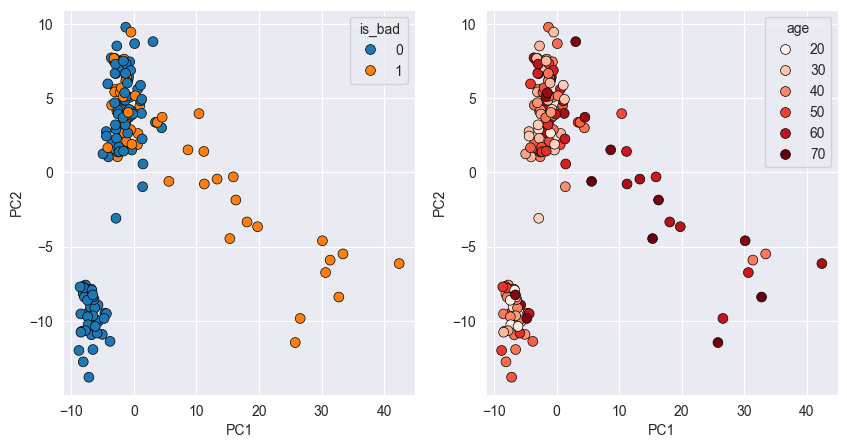

In [7]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(
    data=PCA_scores,
    x='PC1',
    y='PC2',
    hue='is_bad',
    linewidth=0.5,
    edgecolor='k',
    s=50,
    # palette='Reds',
    # hue_order=['0', '1-2', '3-4', '5-7'],
    ax=ax1
)

sns.scatterplot(
    data=PCA_scores,
    x='PC1',
    y='PC2',
    hue='age',
    linewidth=0.5,
    edgecolor='k',
    s=50,
    palette='Reds',
    hue_order=['0', '1-2', '3-4', '5-7'],
    ax=ax2
)
plt.show()

In [8]:
# processed_data.to_csv("transomic_covid_data_processed_gt.csv")
compound_names = processed_data.columns.tolist()
# df = pd.DataFrame({"Compounds": compound_names})
# df.to_csv("Compounds_to_metaboanalyse_gt.csv")

In [9]:
conversion_table = pd.read_csv('/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/mummichog/pathway_analysis/systematic/name_maps/name_map_gt.csv')
conversion_table["Comment"].value_counts()
conversion_table.head()

,Query,Match,HMDB,PubChem,ChEBI,KEGG,METLIN,SMILES,Comment
0,Spermidine,Spermidine,HMDB0001257,1102.0,16610,C00315,254.0,NCCCCNCCCN,1
1,L-lysine,Lysine,HMDB0000182,5962.0,18019,C00047,5200.0,NCCCC[C@H](N)C(O)=O,1
2,Pipecolate,Pipecolic acid,HMDB0000070,849.0,17964,C00408,50.0,OC(=O)C1CCCCN1,1
3,D-ornithine,D-Ornithine,HMDB0003374,71082.0,16176,C00515,6910.0,NCCC[C@@H](N)C(O)=O,1
4,"Nepsilon,nepsilon,nepsilon-trimethyllysine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="ChEBI", matrix=processed_data)
# processed_data_mapped.head()

In [11]:
reactome_pathways  = sspa.process_reactome(organism="Homo sapiens")

In [12]:
kegg_human_pathways  = sspa.process_kegg(organism="hsa")

In [13]:
reactome_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
R-HSA-1059683,Interleukin-6 signaling,30616,456216,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109581,Apoptosis,61120,4705,456216,28494,36080,15377,43474,30616,16412,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109582,Hemostasis,15366,91144,15377,15378,15379,456215,456216,35366,37941,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494,36080,15377,43474,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109703,PKB-mediated events,456216,16618,17489,15377,456215,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
kegg_human_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,316,317,318,319,320,321,322,323,324,325
hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,C00221,C15972,C01159,C00267,C06188,C06187,C00022,C01451,C00118,...,None,None,None,None,None,None,None,None,None,None
hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),C15972,C00026,C00022,C05125,C00024,C16255,C00122,C00417,C00158,...,None,None,None,None,None,None,None,None,None,None
hsa00030,Pentose phosphate pathway - Homo sapiens (human),C03752,C00221,C01801,C00257,C00258,C20589,C00121,C00620,C00022,...,None,None,None,None,None,None,None,None,None,None
hsa00040,Pentose and glucuronate interconversions - Hom...,C20680,C06441,C00508,C04575,C00474,C00714,C00532,C05411,C00026,...,None,None,None,None,None,None,None,None,None,None
hsa00051,Fructose and mannose metabolism - Homo sapiens...,C01721,C00424,C00976,C00096,C00267,C00159,C01099,C11544,C01934,...,None,None,None,None,None,None,None,None,None,None


In [15]:
## if using Reactome database as the pathway database
# count all compounds in the dataset
print(len(compound_names), "compounds in the dataset")

# find how many input compound names in the dataset had a matching ChEBI ID
# chebi_matches = conversion_table[(conversion_table["Comment"] == 1) & (conversion_table["ChEBI"].isnull()==False)]["ChEBI"]
# print(len(chebi_matches), "compounds from the dataset that have ChEBI IDs")

# # count all unique compounds in the Reactome database
# all_reactome_cpds = set(sum(sspa.utils.pathwaydf_to_dict(reactome_pathways).values(), []))
# print(all_reactome_cpds)
# print(len(all_reactome_cpds), "total unique compounds in Reactome")

# # find the intesect between all reactome compounds and all ChEBI IDs annotated to the dataset
# mapped_annotated_cpds = set(processed_data_mapped.columns) & all_reactome_cpds
# print(len(mapped_annotated_cpds), "compounds present in both the dataset and Reactome pathways")

515 compounds in the dataset


In [16]:
print(len(compound_names), "compounds in the dataset")
kegg_matches = conversion_table[(conversion_table["Comment"] == 1) & (conversion_table["KEGG"].isnull()==False)]["KEGG"]
print(len(kegg_matches), "compounds from the dataset that have KEGG IDs")

kegg_human_pathways  = sspa.process_kegg(organism="hsa")
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="KEGG", matrix=processed_data)
all_kegg_cpds = set(sum(sspa.utils.pathwaydf_to_dict(kegg_human_pathways).values(), []))
print(len(all_kegg_cpds))
mapped_annotated_cpds = set(processed_data_mapped.columns) & all_kegg_cpds
print(len(mapped_annotated_cpds), "compounds present in both the dataset and kegg pathways")

515 compounds in the dataset
284 compounds from the dataset that have KEGG IDs
3398
150 compounds present in both the dataset and kegg pathways


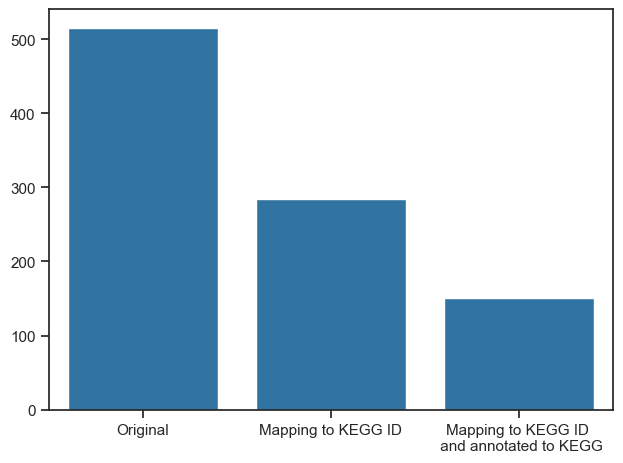

In [17]:
sns.set_context('notebook')
sns.set_style('ticks')
sns.barplot(
    y=[len(compound_names), len(kegg_matches), len(mapped_annotated_cpds)],
    x=['Original', 'Mapping to KEGG ID', 'Mapping to KEGG ID \n and annotated to KEGG']
    )
plt.tight_layout()
plt.show()

In [18]:
data = dict(count=[len(compound_names), len(kegg_matches), len(mapped_annotated_cpds)],
            label=['Ground Truth Annotations', 'Annotations with KEGG ID', 'Annotated to KEGG pathways'])

fig = px.funnel(data, x='count', y='label')
fig.show(renderer="vscode")

In [19]:
# import plotly.io as pio
# pio.renderers.default = "notebook"

# df = pd.DataFrame(compound_names, columns=['Original_ID'])
# df["Matched_ID"] = df['Original_ID'].map(dict(zip(conversion_table["Query"], conversion_table["ChEBI"])))
# df["In_pathway"] = [i if i in mapped_annotated_cpds else "NA" for i in df["Matched_ID"] ]
# df = df.replace({"NA":0})
# df[df != 0] = 1
# df = df.astype("float")
# df.index = compound_names

# fig = px.bar(df)
# fig.show(renderer="vscode")

In [20]:
# convert the pathway dataframe to dictionary - for faster calculations
# replace reactome_pathways with the variable containing the pathway dataframe being used
# pathways_dict = sspa.utils.pathwaydf_to_dict(reactome_pathways)
pathways_dict = sspa.utils.pathwaydf_to_dict(kegg_human_pathways)

# How many pathways contain at least two mapped compounds?
pathways_present = {k: v for k, v in pathways_dict.items() if len([i for i in processed_data_mapped.columns if i in v]) > 1}
print(len(pathways_present))

100


In [21]:
# initiate an ORA object
ora = sspa.sspa_ora(
    mat=processed_data_mapped, # Processed data matrix
    metadata=df_combined['is_bad'], # metadata column
    pathways=kegg_human_pathways, # pathway dataframe
    DA_cutoff=0.01, # t-test cutoff to select differential metabolites
    custom_background=None) # None sets to the default background set which are all annotated compounds provided in the input matrix

# perform ORA
ora_res = ora.over_representation_analysis()

In [22]:
print('There are', len(ora.DA_molecules), 'differential metabolites')
print(ora.DA_molecules)

There are 100 differential metabolites
['C00515', 'C00135', 'C02918', 'C00581', 'C01152', 'C00064', 'C00300', 'C00148', 'C05828', 'C00437', 'C06104', 'C00366', 'C00153', 'C01046', 'C00106', 'C00242', 'C00643', 'C02477', 'C00550', 'C02693', 'C00847', 'C16359', 'C03975', 'C04152', 'C05635', 'C00328', 'C02835', 'C05587', 'C10858', 'C00120', 'C08287', 'C02155', 'C03219', 'C00170', 'C01657', 'C02470', 'C05135', 'C10833', 'C11584', 'C01717', 'C03519', 'C00525', 'C00642', 'C02710', 'C01879', 'C04148', 'C15561', 'C02712', 'C01419', 'C00955', 'C00355', 'C07534', 'C09311', 'C10480', 'C00108', 'C14516', 'C00805', 'C00025', 'C01717', 'C00793', 'C00148', 'C02043', 'C05660', 'C08261', 'C10084', 'C01598', 'C00637', 'C16911', 'C10028', 'C12272', 'C00978', 'C14437', 'C05593', 'C10475', 'C01626', 'C05588', 'C09833', 'C00903', 'C17821', 'C06972', 'C19530', 'C07113', 'C10343', 'C01829', 'C02637', 'C07086', 'C09926', 'C00410', 'C03882', 'C02140', 'C17002', 'C08898', 'C01481', 'C06426', 'C06427', 'C16681', 

In [23]:
ora.DA_test_res.sort_values(by="P-value")

,Entity,P-value,P-adjust
199,C05588,1.509601e-11,4.302362e-09
140,C00108,6.461385e-10,9.207473e-08
118,C00642,1.515109e-09,1.439354e-07
62,C03975,6.566592e-09,4.646533e-07
61,C16359,8.151813e-09,4.646533e-07
...,...,...,...
88,C00741,9.659439e-01,9.796940e-01
66,C21016,9.851868e-01,9.927889e-01
258,C00535,9.869908e-01,9.927889e-01
85,C00268,9.922628e-01,9.927889e-01


In [24]:
ora_res

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust,DA_Metabolites_ID
0,hsa00061,Fatty acid biosynthesis - Homo sapiens (human),2/2,2/56,0.130883,0.872876,"C00712, C08362"
1,hsa00130,Ubiquinone and other terpenoid-quinone biosynt...,1/6,6/71,0.935286,0.948098,C02477
2,hsa00140,Steroid hormone biosynthesis - Homo sapiens (h...,2/10,10/99,0.930020,0.948098,"C00410, C02140"
3,hsa00220,Arginine biosynthesis - Homo sapiens (human),3/5,5/23,0.253983,0.872876,"C00064, C00437, C00025"
4,hsa00230,Purine metabolism - Homo sapiens (human),3/6,6/95,0.378535,0.872876,"C00064, C00242, C00366"
...,...,...,...,...,...,...,...
69,hsa05033,Nicotine addiction - Homo sapiens (human),1/2,2/7,0.595043,0.872876,C00025
70,hsa05034,Alcoholism - Homo sapiens (human),2/4,4/10,0.460273,0.872876,"C00025, C00355"
71,hsa05143,African trypanosomiasis - Homo sapiens (human),1/2,2/8,0.595043,0.872876,C00328
72,hsa05207,Chemical carcinogenesis - receptor activation ...,1/3,3/28,0.743125,0.872876,C00410


In [25]:
ora_res.sort_values(by="P-value")

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust,DA_Metabolites_ID
14,hsa00380,Tryptophan metabolism - Homo sapiens (human),12/16,16/83,0.001386,0.076545,"C01717, C00108, C02693, C05660, C00637, C01598..."
11,hsa00340,Histidine metabolism - Homo sapiens (human),6/6,6/47,0.002069,0.076545,"C00025, C05828, C05135, C01152, C02835, C00135"
34,hsa01040,Biosynthesis of unsaturated fatty acids - Homo...,4/6,6/69,0.129430,0.872876,"C06429, C00712, C06427, C06426"
0,hsa00061,Fatty acid biosynthesis - Homo sapiens (human),2/2,2/56,0.130883,0.872876,"C00712, C08362"
32,hsa00910,Nitrogen metabolism - Homo sapiens (human),2/2,2/19,0.130883,0.872876,"C00064, C00025"
...,...,...,...,...,...,...,...
57,hsa04923,Regulation of lipolysis in adipocytes - Homo s...,1/5,5/14,0.897311,0.935225,C02140
55,hsa04913,Ovarian steroidogenesis - Homo sapiens (human),1/5,5/20,0.897311,0.935225,C00410
2,hsa00140,Steroid hormone biosynthesis - Homo sapiens (h...,2/10,10/99,0.930020,0.948098,"C00410, C02140"
1,hsa00130,Ubiquinone and other terpenoid-quinone biosynt...,1/6,6/71,0.935286,0.948098,C02477


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34613/1014404615.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




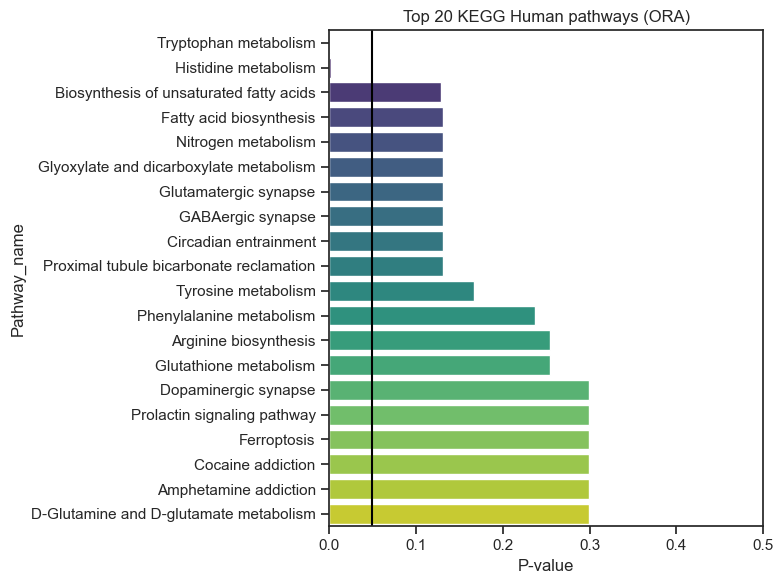

In [ ]:
top_20_pathways = ora_res.sort_values(by="P-value").iloc[0:20, :]
top_20_pathways["Pathway_name"] = top_20_pathways["Pathway_name"].str.replace(" - Homo sapiens \\(human\\)", "", regex=True)

plt.figure(figsize=(8, 6))
sns.set_style('ticks')
sns.barplot(
    data=top_20_pathways,
    y="Pathway_name",
    x="P-value",
    orient="h",
    palette="viridis"
    )
plt.axvline(0.05, c="black")
plt.title('Top 20 KEGG Human pathways (ORA)')
plt.xlim([0, 0.5])
plt.tight_layout()
save_name = "/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa/mummichog/pathway_analysis/systematic/PA_results/ORA_top_20_gt.png"
plt.savefig(save_name, dpi=300, bbox_inches="tight")
plt.show()